# IMPORTS

In [1]:
import pandas as pd
from sklearn.metrics import make_scorer
import os
import warnings
warnings.filterwarnings("ignore")
os.system('pip install catboost lightgbm pip install statsmodels pip install xgboost pip install imblearn')
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split as tts
from imblearn.ensemble import BalancedBaggingClassifier  
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier 
from imblearn.ensemble import EasyEnsembleClassifier  
from imblearn.ensemble import RUSBoostClassifier 
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek 
os.system('pip install colour')
from sklearn.model_selection import cross_val_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 KB 46.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Data processing

## Downloading Data

In [2]:
x_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
x_train['y'] = y_train.target
x_train = x_train[~(x_train.age == 0)]
x_train.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,y
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0,0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0,0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0,0


## Feature engineering

In [3]:
des = x_train.describe()
des = des.append(pd.Series(data={ _:np.sum(np.isnan(x_train[_])) for _ in x_train.columns}, name='nans'), ignore_index= False)
des

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,y
count,105108.000000,105108.000000,105108.000000,105108.000000,8.411500e+04,105108.000000,105108.000000,105108.000000,105108.000000,102303.000000,105108.000000
mean,5.825221,53.321574,0.426637,354.191521,6.649734e+03,8.956283,0.269970,1.018505,0.244358,0.757084,0.066893
std,251.022624,14.810164,4.251245,1827.192531,1.106510e+04,5.182731,4.227386,1.136230,4.214038,1.116524,0.249838
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029591,42.000000,0.000000,0.173668,3.343188e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.153790,53.000000,0.000000,0.365038,5.361671e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.554344,64.000000,0.000000,0.880885,8.207870e+03,12.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,48779.730023,111.000000,98.000000,323248.210242,1.359526e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000
nans,0.000000,0.000000,0.000000,0.000000,2.099300e+04,0.000000,0.000000,0.000000,0.000000,2805.000000,0.000000


We can see that columns 'monthly_income' and 'family_members' have lots of nan's in them, so we should replace them. 

In [4]:
crm = x_train.corr()
fig = px.imshow(crm, color_continuous_scale = 'Hot')
fig.update_layout(paper_bgcolor="rgb(1,1,1,1)", font_color = "rgb(255, 255, 255)")
fig.show()

By correlation matrix we can see that family members have correlation with age

In [5]:
x_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,y
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0,0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0,0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,0,2,0,0.0,0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0,0,0.0,0
105106,0.050256,73,1,0.849711,3961.841113,12,0,2,0,0.0,0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0,1,0.0,0


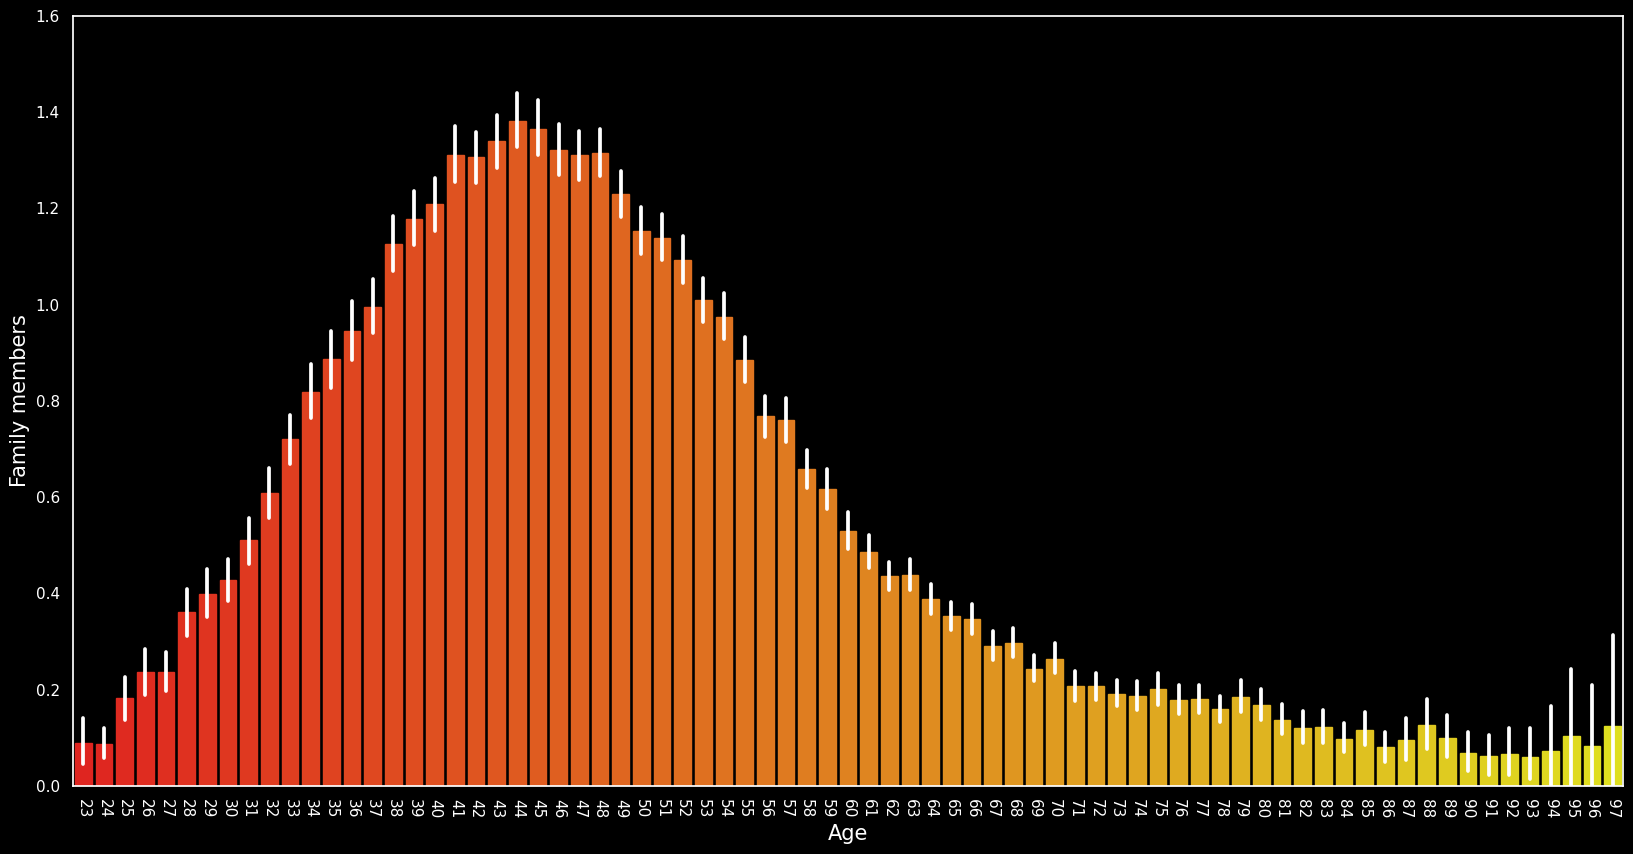

In [6]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
plt.figure(figsize=[20,10])
plt.ylim(0, 1.6)


col = sns.diverging_palette(0, 30, l=65, center="dark")
sns.set_palette(col)
from colour import Color
pal = list(Color("red").range_to(Color("yellow"),77))
pal = [i.rgb for i in pal]


ax1 = sns.barplot(x = x_train["age"], y = x_train["family_members"], palette=pal, errcolor= 'w')
ax1.set_xlabel("Age",fontsize=15, color = 'white')
ax1.set_ylabel("Family members",fontsize=15, color = 'white')
for patch in ax1.patches:
    patch.set_edgecolor(patch.get_facecolor())
for tick_label in ax1.axes.get_yticklabels():
    tick_label.set_color("white")
for tick_labelx in ax1.axes.get_xticklabels():
    tick_labelx.set_color("white")
ax1.grid(False)
ax2 = ax1.set_xticklabels(ax1.get_xticklabels(),rotation=-90)


plt.xlim(1.5, 76.5);

So we can replace nan's with average family members for people of this age, rather than replace it with a simple mean value from the whole dataset. 

In [7]:
for i in range(len(x_train.family_members)):
    if np.isnan(x_train.family_members.iloc[i]):
        x_train.family_members.iloc[i] = np.mean(x_train.family_members[x_train.age == x_train.age.iloc[i]])
x_train.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,y
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0,0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0,0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0,0


Also by correlation matrix, we can see that monthly income correlates with mortgage loans and credit loans, so we can make regression that will predict monthly income in missing points. 

In [8]:
X = x_train.dropna()[['credits_loans', 'mortgage_loans']]
y = x_train.dropna()['monthly_income']
reg = sm.OLS(y, sm.add_constant(X)).fit()
x_train_cp = x_train[x_train.monthly_income.isna()]
x_train[x_train.monthly_income.isna()].monthly_income = reg.predict(sm.add_constant(x_train_cp[['credits_loans', 'mortgage_loans']]))

Again using the correlation matrix we can see a high correlation between three overdue columns. To avoid multicollinearity we can sum all these columns with coefficients 1,2,3 (the more days of overdue - the larger the coefficient is ).


Also, we can deal with family members. This variable seems to be useless on its own, but we can try to divide monthly income by it. 

Farther we can deal with debt/income. As we already have a monthly income in the columns, then to avoid multicollinearity we can multiply monthly income by debt/income to have net debt in columns. 

In [9]:
if 'debt' not in x_train.columns:
    x_train['debt'] = x_train.debt_to_income * x_train.monthly_income
    x_train.drop(columns=['debt_to_income'], inplace=True)

if 'overdue_30_59_days' in x_train.columns:
    x_train['overdue'] = 0
    x_train['overdue'] += x_train['overdue_30_59_days']
    x_train['overdue'] += x_train['overdue_60_89_days']*2
    x_train['overdue'] += x_train['overdue__more_than_90_days']*3

if 'overdue_30_59_days' in x_train.columns:
    x_train.drop(columns=['overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days'], inplace=True)

if 'family_members' in x_train.columns:
    x_train['monthly_income'] = x_train['monthly_income']/(x_train['family_members']+1)
    x_train.drop(columns=['family_members'], inplace=True)

# Machine learning

For us, the most important thing is to minimize the number of real defaults that were classified as non-default, that is, after the selection of clients by the model, the bank would receive as few clients who would not be able to repay the loan, as possible. However, it is also important that the number of issued loans does not decrease significantly after the model has been run. That is why we will use two metrics to assess the model's performance: FOR(False Ommission Rate) will show how many clients, of which the model offered to issue a loan, will be defaulters, and FPR(False Positive Rate) will show how many of all non-defaulters were denied a loan by the model. By minimizing both metrics we will achieve the best model. 

In [11]:
x_train = x_train.dropna()
x, x_test, y, y_test = tts(x_train.drop(columns = 'y'), x_train.y, test_size=0.33, random_state=1)

In [12]:
def FOR(y_true, y_pred):
    pred = pd.DataFrame({'pred': y_pred, 'true': y_true})
    result = pred[pred.pred == 0].true.sum()/(pred[pred.pred == 0].true.sum()+pred[pred.pred == 0].true.count() - pred[pred.pred == 0].true.sum())
    return result
def FPR(y_true, y_pred):
    pred = pd.DataFrame({'pred': y_pred, 'true': y_true})
    result = pred[pred.true == 1].pred.sum()/(pred[pred.true == 1].pred.sum()+pred[pred.pred == 0].true.count() - pred[pred.pred == 0].true.sum())
    return result
for_scorer = make_scorer(FOR, greater_is_better=False)
fpr_scorer = make_scorer(FPR, greater_is_better=False)

In [13]:
rf = RandomForestClassifier(max_depth=5, random_state=0,max_features= 3,n_estimators = 300)
for_cv = cross_val_score(rf, x, y, cv=5, scoring=for_scorer)
fpr_cv = cross_val_score(rf, x, y, cv=5, scoring=fpr_scorer)
print("Random forest percentage of defaulters accepted:", np.mean(abs(for_cv)))
print("Random forest percentage of non-defaulters denied:",np.mean(abs(fpr_cv)))

Random forest percentage of defaulters accepted: 0.06157209509954144
Random forest percentage of non-defaulters denied: 0.00894500437525476


We can see that in the default setting there is a very low percentage of non-defaulters denied, but there is also no significant decrease in the percentage of defaulters accepted. It means that model is not quite good in terms of optimization of loan issuance. This happens because the target variable is unbalanced. Due to the fact that there are very few defaulters, therefore, the model offers to issue loans to almost everyone, which does not give us the opportunity to significantly improve our profitability. Therefore, we will work with an imbalance in the target.

## Dealing with imbalanced target

In [14]:
x = x.reset_index(drop = True)
y = y.reset_index(drop = True)
def cv(mod, sampler):    
    res_fr, res_fpr = [], []
    for i in range(0, len(x), int(len(x)/5)):
        if i != 0:
            tst = x.iloc[range(prev, i)]
            trn = x.drop(index = range(prev, i))
            y_trn = y.drop(index = range(prev, i))
            if sampler != None:
                X_res, y_res = sampler.fit_resample(trn, y_trn)
            else:
                X_res, y_res = trn, y_trn
            mod = mod.fit(X_res, y_res)
            fr = FOR(y.iloc[range(prev, i)], mod.predict(tst))
            fpr = FPR(y.iloc[range(prev, i)], mod.predict(tst))
            res_fr.append(fr)
            res_fpr.append(fpr)
        prev = i
    return np.mean(res_fr), np.mean(res_fpr)

**Random undersampling**

In [15]:
rus = RandomUnderSampler(random_state = 1)
cv_res = cv(rf, rus)
print("Random forest percentage of defaulters accepted:", cv_res[0])
print("Random forest percentage of non-defaulters denied:",cv_res[1])

Random forest percentage of defaulters accepted: 0.02229382039349247
Random forest percentage of non-defaulters denied: 0.06865497975427493


**Random oversampling**

In [16]:
ros = RandomOverSampler(random_state = 1)
cv_res = cv(rf, ros)
print("Random forest percentage of defaulters accepted:", cv_res[0])
print("Random forest percentage of non-defaulters denied:",cv_res[1])

Random forest percentage of defaulters accepted: 0.023219929614328862
Random forest percentage of non-defaulters denied: 0.06640351091701985


In [17]:
smt = SMOTE(random_state = 1)
cv_res = cv(rf, smt)
print("Random forest percentage of defaulters accepted:", cv_res[0])
print("Random forest percentage of non-defaulters denied:",cv_res[1])

Random forest percentage of defaulters accepted: 0.02597217598935946
Random forest percentage of non-defaulters denied: 0.061573361761688705


**Balanced Random Forest**

In [18]:
brf = BalancedRandomForestClassifier(max_depth=5, max_features=5,  random_state=1, n_estimators = 300)
cv_res = cv(brf, None)
print("Random forest percentage of defaulters accepted:", cv_res[0])
print("Random forest percentage of non-defaulters denied:",cv_res[1])

Random forest percentage of defaulters accepted: 0.022104378087948698
Random forest percentage of non-defaulters denied: 0.06857395735700553


Balanced Random Forest and Random undersampling turned out to be the best ways to deal with the imbalanced target so we will work with them further.

## Profitability of the model

In [19]:
def ins(n, i):
    return n[:i] + ' ' + n[i:]
def bnumber(n):
    n = str(n)
    for i in range(len(n)-3, 0, -3):
        n = ins(n, i)
    return n

**Operating profit without model**

Now we will test them in terms of the best approximate operating profit that they can give us. We will assume that in case of default we lose all the money that the client could spend (i.e his/her credit limit) and we will use an interest rate of 20% because it is the nearest value to the real credit card interest in the US dollars now. We considered the credit limit as half of the income of a person because such restrictions are very popular in banks right now.

In [20]:
x = x.reset_index(drop = True)
y = y.reset_index(drop = True)
res = []
for i in range(0, len(x), int(len(x)/5)):
    if i != 0:
        tst = x.iloc[range(prev, i)]
        check = tst.copy()
        check['y'] = y.iloc[range(prev, i)]
        check['Op'] = 0
        check['Op'][check.y == 0] = 0.2*(check[check.y == 0].monthly_income)/2
        check['Op'][check.y == 1] = -1*(check[check.y == 1].monthly_income)/2
        res.append(check.Op.sum())
    prev = i
print('Operating profit before using model:', bnumber(round(np.mean(res))))

Operating profit before using model: 3 393 589


**Operating profit with different models**

To calculate operating profit with model we will count it only for those clients that are predicted to be non-defaulters by the model. For different models we may have different optimal thresholds may be optimal in terms of operating profit so we should try several options.

In [42]:
x = x.reset_index(drop = True)
y = y.reset_index(drop = True)
def operating_profit_cv(mod, sampler):    
    res = []
    for i in range(0, len(x), int(len(x)/5)):
        if i != 0:
            tst = x.iloc[range(prev, i)]
            trn = x.drop(index = range(prev, i))
            y_trn = y.drop(index = range(prev, i))
            check = tst.copy()
            check['y'] = y.iloc[range(prev, i)]
            check['Op'] = 0
            check['Op'][check.y == 0] = 0.2*(check[check.y == 0].monthly_income)/2
            check['Op'][check.y == 1] = -1*(check[check.y == 1].monthly_income)/2
            if sampler != None:
                X_res, y_res = sampler.fit_resample(trn, y_trn)
            else:
                X_res, y_res = trn, y_trn
            mod = mod.fit(X_res, y_res)
            check['pred'] = mod.predict_proba(tst)[:,1]
            best = 0
            for j in np.arange(0.05, 0.91, 0.05):
                rev = check[check.pred <= j].Op.sum()
                if rev > best:
                    best = rev
                    bi = j
            res.append(best)
        prev = i
    return np.mean(res)

In [43]:
brf_rev = operating_profit_cv(brf, None)
rf_rev = operating_profit_cv(rf, rus)

In [44]:
print('Balanced Random Forest operating profit:', bnumber(round(brf_rev)))
print('Random Forest operating profit:', bnumber(round(rf_rev)))

Balanced Random Forest operating profit: 3 778 978
Random Forest operating profit: 3 768 180


Now, as one of the two best resampling strategies is Random Undersampling we can use it not only with Random Forest, but try other models. 

In [45]:
import lightgbm as lgb
lgbm = LGBMClassifier(random_state=1, max_depth=4, n_estimators=100, verbose= -100)
cat = CatBoostClassifier(random_state=1, learning_rate = 0.05, iterations = 200, max_depth = 6, silent=True)
xgb = XGBClassifier(random_state=1, learning_rate = 0.05, max_depth = 2, min_child_weight = 6, eval_metric = 'logloss')
gbc = GradientBoostingClassifier(random_state=1, learning_rate = 0.003, max_depth = 3, n_estimators = 500, subsample = 0.4)
lgbm_rev = operating_profit_cv(lgbm, rus)
cat_rev = operating_profit_cv(cat, rus)
xgb_rev = operating_profit_cv(xgb, rus)
gbc_rev = operating_profit_cv(gbc, rus)

print('Light GBM operating profit:', bnumber(round(lgbm_rev)))
print('XGBoost operating profit:', bnumber(round(cat_rev)))
print('Gradient Boosting Classifier operating profit:', bnumber(round(xgb_rev)))
print('CatBoost operating profit:', bnumber(round(gbc_rev)))

Light GBM operating profit: 3 756 471
XGBoost operating profit: 3 767 588
Gradient Boosting Classifier operating profit: 3 769 980
CatBoost operating profit: 3 766 174


**Stacking with Random Forest**

In [46]:
stc = StackingClassifier(estimators=[('rf',rf), ('gbc', gbc)], final_estimator=LogisticRegression())
stc2 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('cat', cat)], final_estimator=LogisticRegression())
stc3 = StackingClassifier(estimators=[('brf',brf), ('rf', lgbm)], final_estimator=LogisticRegression())
stc4 = StackingClassifier(estimators=[('brf',brf), ('xgb', xgb), ('lgbm', lgbm)], final_estimator=LogisticRegression())
stc5 = StackingClassifier(estimators=[('brf',brf), ('rf', rf), ('cat', cat)], final_estimator=LogisticRegression())

stc_rev = operating_profit_cv(stc, rus)
stc2_rev = operating_profit_cv(stc2, rus)
stc3_rev = operating_profit_cv(stc3, None)
stc4_rev = operating_profit_cv(stc4, None)
stc5_rev = operating_profit_cv(stc5, None)

print('Stacking 1:', bnumber(round(stc_rev)))
print('Stacking 2:', bnumber(round(stc2_rev)))
print('Stacking 3:', bnumber(round(stc3_rev)))
print('Stacking 4:', bnumber(round(stc4_rev)))
print('Stacking 5:', bnumber(round(stc5_rev)))

Stacking 1: 3 772 312
Stacking 2: 3 769 629
Stacking 3: 3 779 963
Stacking 4: 3 779 627
Stacking 5: 3 784 322


As we can see, the best models in terms of operating profit are Stackings with Balanced Random Forest but no resampling. 

# Results

Now, let's see what are the final results on the test set.

In [47]:
x = x.reset_index(drop = True)
y = y.reset_index(drop = True)
res = []
check = x_test.copy()
check['y'] = y_test
check['Op'] = 0
check['Op'][check.y == 0] = 0.2*(check[check.y == 0].monthly_income)/2
check['Op'][check.y == 1] = -1*(check[check.y == 1].monthly_income)/2
def_pro = round(check.Op.sum())
print('Operating profit before using model:', bnumber(def_pro))

Operating profit before using model: 8 490 463


In [48]:
def operating_profit_test(mod):
    check = x_test.copy()
    check['y'] = y_test
    check['Op'] = 0
    check['Op'][check.y == 0] = 0.2*(check[check.y == 0].monthly_income)/2
    check['Op'][check.y == 1] = -1*(check[check.y == 1].monthly_income)/2
    check['pred'] = mod.predict_proba(x_test)[:,1]
    best = 0
    for j in np.arange(0.05, 0.91, 0.05):
        rev = check[check.pred <= j].Op.sum()
        if rev > best:
            best = rev
            bi = j
    return best, bi

In [49]:
stc3 = StackingClassifier(estimators=[('brf',brf), ('rf', lgbm)], final_estimator=LogisticRegression()).fit(x, y)
stc4 = StackingClassifier(estimators=[('brf',brf), ('xgb', xgb), ('lgbm', lgbm)], final_estimator=LogisticRegression()).fit(x, y)
stc5 = StackingClassifier(estimators=[('brf',brf), ('rf', rf), ('cat', cat)], final_estimator=LogisticRegression()).fit(x, y)
brf = BalancedRandomForestClassifier(max_depth=5, max_features=5,  random_state=1, n_estimators = 300).fit(x, y)
rf = RandomForestClassifier(max_depth=5, max_features=5,  random_state=1, n_estimators = 300).fit(x, y)

In [50]:
stc3_rev = operating_profit_test(stc3)
stc4_rev = operating_profit_test(stc4)
stc5_rev = operating_profit_test(stc5)
brf_rev = operating_profit_test(brf)
rf_rev = operating_profit_test(rf)

In [51]:
def iip (best_res):
    return f'{round(((best_res/def_pro)-1)*100, 2)}%'

In [52]:
def FOR(model, thrs):
    cm = metrics.confusion_matrix(y_test, (model.predict_proba(x_test)[:,1] > thrs).astype(int))
    result = cm[1][0]/(cm[1][0]+cm[0][0])
    return result
def FPR(model, thrs):
    cm = metrics.confusion_matrix(y_test, (model.predict_proba(x_test)[:,1] > thrs).astype(int))
    result = cm[0][1]/(cm[0][1]+cm[0][0])
    return result

In [53]:
result = pd.DataFrame()
result['Model'] = ['Stacking BRF & LGBM', 'Stacking BRF & XGB & LGBM', 'Stacking BRF & RF & CAT', 'Random Forest', 'Balanced Random Forest']
result['Increase in operating profit'] = [iip(stc3_rev[0]), iip(stc4_rev[0]), iip(stc5_rev[0]), iip(rf_rev[0]), iip(brf_rev[0])]
result['Accepted defaulters'] = [FOR(stc3, stc3_rev[1]), FOR(stc4, stc4_rev[1]), FOR(stc5, stc5_rev[1]), FOR(rf, rf_rev[1]), FOR(brf, brf_rev[1])]
result['Denied non-defaulters'] = [FPR(stc3, stc3_rev[1]), FPR(stc4, stc4_rev[1]), FPR(stc5, stc5_rev[1]), FPR(rf, rf_rev[1]), FPR(brf, brf_rev[1])]
result['Accepted defaulters'] = (100*result['Accepted defaulters']).apply(lambda x: str(round(x, 2)) + '%')
result['Denied non-defaulters'] = (100*result['Denied non-defaulters']).apply(lambda x: str(round(x, 2)) + '%')
result.sort_values(by='Increase in operating profit', ignore_index=True, ascending=False)

,Model,Increase in operating profit,Accepted defaulters,Denied non-defaulters
0,Stacking BRF & RF & CAT,12.33%,4.09%,4.83%
1,Stacking BRF & XGB & LGBM,12.29%,4.06%,4.96%
2,Stacking BRF & LGBM,12.28%,4.06%,4.97%
3,Balanced Random Forest,12.06%,3.75%,6.3%
4,Random Forest,11.82%,4.19%,4.55%


We can see that with the Stacking of Balanced Random Forest, Catboost, and Random Forest we again get the best result by operating profit. This model gives us a 12% increase in operating profit, which is a significant improvement for the bank. So we can conclude that the bank should implement this model to check clients before issuing a credit card for them. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b39a9864-f85b-445d-919a-a7a2594d9f8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>